## Data Reading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas import read_csv
data1 = read_csv('/content/drive/MyDrive/loan_data.csv')
data1

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


##Data Info

In [ ]:
data1.describe()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
data1['person_gender'].unique()
data1['person_education'].unique()
data1['person_home_ownership'].unique()
data1['loan_intent'].unique() #get dummies
#data1['previous_loan_defaults_on_file'].unique()


array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

## Data Encoding

In [ ]:
#Encoding
from pandas import get_dummies
# Mapping to encode Ordinal Categorical features
data1['person_gender'] = data1['person_gender'].map({'male':1, 'female':0})
data1['person_education'] = data1['person_education'].map({'High School':0, 'Bachelor':1, 'Associate':2, 'Master':3, 'Doctorate':4})
data1['previous_loan_defaults_on_file'] = data1['previous_loan_defaults_on_file'].map({'Yes':1, 'No':0})

# Using get dummies to encode Nominal Categorical features
data1=get_dummies(data1,columns=['person_home_ownership','loan_intent'],dtype=int)


In [ ]:
data1.info() # Checking Data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   loan_amnt                       45000 non-null  float64
 6   loan_int_rate                   45000 non-null  float64
 7   loan_percent_income             45000 non-null  float64
 8   cb_person_cred_hist_length      45000 non-null  float64
 9   credit_score                    45000 non-null  int64  
 10  previous_loan_defaults_on_file  45000 non-null  int64  
 11  loan_status                     45000 non-null  int64  
 12  person_home_ownership_MORTGAGE  

# Data Splitting into input and output variables

In [ ]:
X = data1.drop('loan_status', axis = 1) # Features
Y = data1['loan_status'] # Labels

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   loan_amnt                       45000 non-null  float64
 6   loan_int_rate                   45000 non-null  float64
 7   loan_percent_income             45000 non-null  float64
 8   cb_person_cred_hist_length      45000 non-null  float64
 9   credit_score                    45000 non-null  int64  
 10  previous_loan_defaults_on_file  45000 non-null  int64  
 11  person_home_ownership_MORTGAGE  45000 non-null  int64  
 12  person_home_ownership_OTHER     

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45000 entries, 0 to 44999
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
45000 non-null  int64
dtypes: int64(1)
memory usage: 351.7 KB


#Data Scaling and Splitting into training and test set

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Scaling the feature values
X_scaled = StandardScaler().fit_transform(X)

#Spliting Data
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size= 0.25, random_state=100)

# Data Balancing

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state = 20) # Building the balancing model
sm_x_train,sm_y_train = sm.fit_resample(X_train,Y_train) # Balancing the data

##k-nearest neighbors (KNN) Classification Model

## KNN with Gridsearch CV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, confusion_matrix
from imblearn.pipeline import Pipeline

# Create pipeline variable for Gridsearch for applying balancing and classification

knn_pipeline = Pipeline([
    ('balancing', SMOTE(random_state=20)),  # Apply SMOTE to training data
    ('classification', KNeighborsClassifier())  # KNN model
])

# Create variable for parameter grid for tuning
param_grid = {
    "classification__n_neighbors": [3, 5, 7, 9, 11],   # Number of neighbors to consider
    "classification__weights": ["uniform", "distance"],  # Weight function
    "classification__metric": ["euclidean", "manhattan"]    # Distance metric
}

# Perform GridSearchCV (using precision as the scoring metric)
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=4, scoring="precision", n_jobs=-1, verbose=1)
grid_search.fit(X_scaled, Y)

# Get the best model and parameters
best_knn = grid_search.best_estimator_  # Extract the best trained model
print("Best Parameters:", grid_search.best_params_)
print("Best Precision on Cross-Validation:", grid_search.best_score_)

Best Parameters: {'classification__metric': 'manhattan', 'classification__n_neighbors': 3, 'classification__weights': 'distance'}
Best Precision on Cross-Validation: 0.6596028548239615


## Random Forest Classification Model

# Random Forest with Gridsearch


In [ ]:
# Random Forest Classifier with GridSearch
from sklearn import ensemble
from pandas import  Series
from sklearn.model_selection import GridSearchCV

#Build RF classifier
RF_classifier2=Pipeline([('balancing',SMOTE(random_state=86)),('classification',ensemble.RandomForestClassifier(criterion='entropy',max_features='sqrt',random_state=1))])   #Combining the balancing and classification methods for evaluation
no_trees = {'classification__n_estimators': [300, 350, 400, 450]}                                                                                                            #Defining total number of estimators to be tested
grid_search1 = GridSearchCV(estimator=RF_classifier2, param_grid=no_trees, scoring='precision', cv=5)
grid_search1.fit(X_scaled, Y)                                                                                                                                                ## training, testing , evaluation, ranking.

#Store best parameters into a new variable
best_parameters = grid_search1.best_params_
print(best_parameters)

#Store Best results into a new variable
best_result = grid_search1.best_score_
print(best_result)

# Extract feature importances from the best model
best_model = grid_search1.best_estimator_.named_steps['classification']
Important_feature = Series(best_model.feature_importances_, index=list(X)).sort_values(ascending=False)
print("Feature Importances:\n", Important_feature)

{'classification__n_estimators': 300}
0.8023232883867083
Feature Importances:
 previous_loan_defaults_on_file    0.332739
loan_percent_income               0.129532
loan_int_rate                     0.128170
person_income                     0.087785
loan_amnt                         0.050270
credit_score                      0.041446
cb_person_cred_hist_length        0.034700
person_age                        0.034440
person_home_ownership_RENT        0.032441
person_emp_exp                    0.031328
person_education                  0.020722
person_home_ownership_MORTGAGE    0.018532
person_home_ownership_OWN         0.010507
loan_intent_VENTURE               0.008847
loan_intent_HOMEIMPROVEMENT       0.007257
loan_intent_DEBTCONSOLIDATION     0.007119
person_gender                     0.006927
loan_intent_MEDICAL               0.006729
loan_intent_EDUCATION             0.005518
loan_intent_PERSONAL              0.004595
person_home_ownership_OTHER       0.000398
dtype: float64


# Random Forest Classifier with GridSearch and best features

In [ ]:

from sklearn import ensemble
from pandas import  Series
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

X1=X[['previous_loan_defaults_on_file','loan_percent_income','loan_int_rate','person_income','loan_amnt','credit_score']]
#Scaling the feature values
X_scaled1 = StandardScaler().fit_transform(X1)

#Build RF classifier
RF_classifier2=Pipeline([('balancing',SMOTE(random_state=86)),('classification',ensemble.RandomForestClassifier(criterion='entropy',max_features='sqrt',random_state=1))])   #Combining the balancing and classification methods for evaluation
no_trees = {'classification__n_estimators': [300, 350, 400, 450]}                                                                                                            #Defining total number of estimators to be tested
grid_search1 = GridSearchCV(estimator=RF_classifier2, param_grid=no_trees, scoring='precision', cv=4)
grid_search1.fit(X_scaled1, Y)                                                                                                                                                ## training, testing , evaluation, ranking.

#Store best parameters into a new variable
best_parameters = grid_search1.best_params_
print(best_parameters)

#Store Best results into a new variable
best_result = grid_search1.best_score_
print(best_result)

{'classification__n_estimators': 300}
0.7468817803640468


#RandomForest with best features

In [ ]:

from sklearn.ensemble import RandomForestClassifier

#Spliting Data
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_scaled1, Y, test_size= 0.25, random_state=100)

sm=SMOTE(random_state = 20)
sm_x_train,sm_y_train = sm.fit_resample(X_train1,Y_train1)


RF_classifier1 = RandomForestClassifier(n_estimators = 300, criterion ='entropy', max_features = 'sqrt', random_state = 1 )#building the model
RF_classifier1.fit(sm_x_train, sm_y_train) #training
y_pred1 = RF_classifier1.predict(X_test1) #Testing

#Evaluation
precision = precision_score(Y_test1,y_pred1)
confusion_matrix = confusion_matrix(Y_test1,y_pred1)

print("Precision",precision)
print("Confusion Matrix",confusion_matrix)

Precision 0.7548736462093862
Confusion Matrix [[8097  679]
 [ 383 2091]]


# **Final Selected Model:** Random Forest without best features and the number of estimators (300) derived from Grid Search


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix

RF_classifier1 = RandomForestClassifier(n_estimators = 300, criterion ='entropy', max_features = 'sqrt', random_state = 1 )#building the model
RF_classifier1.fit(sm_x_train, sm_y_train) #training
y_pred2 = RF_classifier1.predict(X_test) #Testing

#Evaluation
precision = precision_score(Y_test,y_pred2)
confusion_matrix = confusion_matrix(Y_test,y_pred2)

print("Precision",precision)
print("Confusion Matrix",confusion_matrix)

Precision 0.8055662930034789
Confusion Matrix [[8273  503]
 [ 390 2084]]


## Support Vector Classifier

####Creating separate iterations for different compinations of feature tuning to handle issue of computational failure

In [ ]:
#  Support Vector Classifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
SVM_classifier2 = Pipeline([('balancing', SMOTE(random_state = 101)),('classification', svm.SVC(random_state=10) ) ]) # bulilding classifier
kernels_c = {'classification__kernel': ['linear'], 'classification__C': [0.1,1,10]}
grid_search3 = GridSearchCV(estimator=SVM_classifier2, param_grid=kernels_c, scoring='precision', cv=5)
grid_search3.fit(X_scaled, Y)#training and testing,.....

best_parameters = grid_search3.best_params_
print(best_parameters)
best_result = grid_search3.best_score_
print(best_result)

{'classification__C': 1, 'classification__kernel': 'linear'}
0.6256741907155169


In [ ]:
#  Support Vector Classifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
SVM_classifier2 = Pipeline([('balancing', SMOTE(random_state = 101)),('classification', svm.SVC(random_state=10) ) ]) # bulilding classifier
kernels_c = {'classification__kernel': ['sigmoid'], 'classification__C': [0.1,1,10]}
grid_search3 = GridSearchCV(estimator=SVM_classifier2, param_grid=kernels_c, scoring='precision', cv=5)
grid_search3.fit(X_scaled, Y)#training and testing,.....

best_parameters = grid_search3.best_params_
print(best_parameters)
best_result = grid_search3.best_score_
print(best_result)

{'classification__C': 1, 'classification__kernel': 'sigmoid'}
0.6424478564278981


In [ ]:
#  Support Vector Classifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
SVM_classifier2 = Pipeline([('balancing', SMOTE(random_state = 101)),('classification', svm.SVC(random_state=10) ) ]) # bulilding classifier
kernels_c = {'classification__kernel': ['poly'], 'classification__C': [0.1,1,10]}
grid_search3 = GridSearchCV(estimator=SVM_classifier2, param_grid=kernels_c, scoring='precision', cv=5)
grid_search3.fit(X_scaled, Y)#training and testing,.....

best_parameters = grid_search3.best_params_
print(best_parameters)
best_result = grid_search3.best_score_
print(best_result)

{'classification__C': 1, 'classification__kernel': 'poly'}
0.6632504903638514


In [ ]:
#  Support Vector Classifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
SVM_classifier2 = Pipeline([('balancing', SMOTE(random_state = 101)),('classification', svm.SVC(random_state=10) ) ]) # bulilding classifier
kernels_c = {'classification__kernel': ['rbf'], 'classification__C': [0.1,1,10]}
grid_search3 = GridSearchCV(estimator=SVM_classifier2, param_grid=kernels_c, scoring='precision', cv=5)
grid_search3.fit(X_scaled, Y)#training and testing,.....

best_parameters = grid_search3.best_params_
print(best_parameters)
best_result = grid_search3.best_score_
print(best_result)

{'classification__C': 1, 'classification__kernel': 'rbf'}
0.6614063786457243


#Cost Benefit Analysis

**Assumptions**


1. Average Loan Amt = €9583​
2. Average Interest (% Simple Interest)= 11%​
3. Average Loan tenure (Years) = 3 years

Previous model cost and benefit calculation in Excel


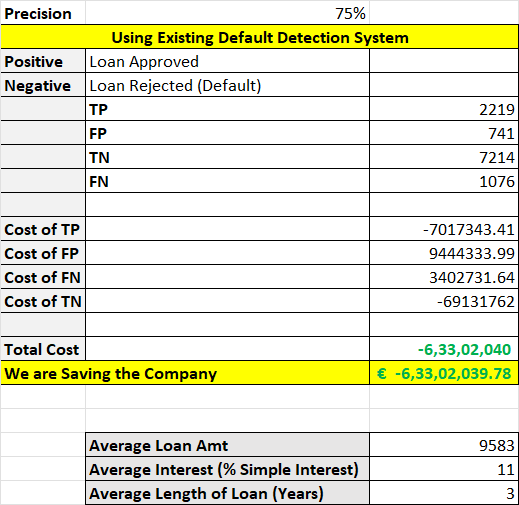

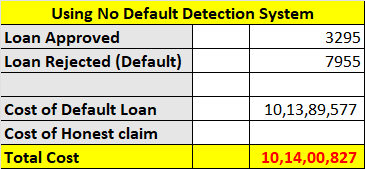

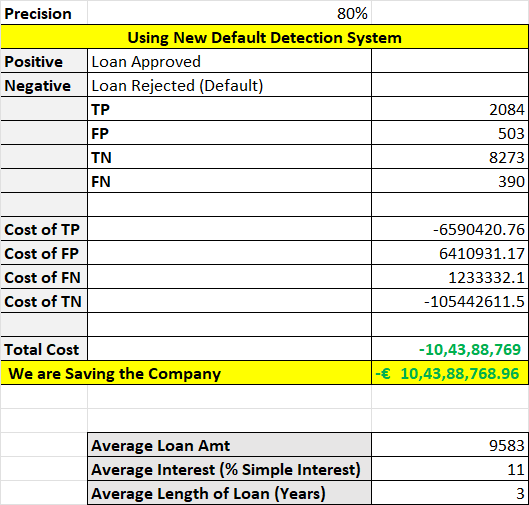

**Scenario 1:** No Default Detection System
Without any detection system, the company approves and rejects loans manually, leading to high financial losses.

*Key Issue:* Without a detection system, the company faces huge losses due to incorrectly approved loans.

**Scenario 2:** Existing Default Detection System (75% Precision)
The older system is less accurate, leading to higher false positives and missed risky loans.

*Key Issue:* The older system saves only €63M, making it €40M less effective than the new model.

**Scenario 3:** New Default Detection System (80% Precision)
The new AI-based detection system correctly identifies more risky loans and saves the company money.

*Key Benefit:* The new system saves €104M per year by reducing bad loan approvals.

**Additional Loan Insights**
Average Loan Amount	= €9,583
Average Interest Rate =	11% (Simple Interest)
Average Loan Duration =	3 Years